In [1]:
#data manipulation libraries

import pandas as pd
#data manipulation libraries
import csv
import pandas as pd
import numpy as np
import re
import string

#methods and stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

##Machine Learning Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings ("ignore")

In [2]:
filename=r"D:\Russia Ukraine war Dataset\0401_UkraineCombinedTweetsDeduped.csv.gzip"
df = pd.read_csv(filename, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364875 entries, 0 to 364874
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          364875 non-null  int64 
 1   username        364875 non-null  object
 2   acctdesc        286432 non-null  object
 3   location        212933 non-null  object
 4   following       364875 non-null  int64 
 5   followers       364875 non-null  int64 
 6   totaltweets     364875 non-null  int64 
 7   usercreatedts   364875 non-null  object
 8   tweetid         364875 non-null  int64 
 9   tweetcreatedts  364875 non-null  object
 10  retweetcount    364875 non-null  int64 
 11  text            364875 non-null  object
 12  hashtags        364875 non-null  object
 13  language        364875 non-null  object
 14  coordinates     97 non-null      object
 15  favorite_count  364875 non-null  int64 
 16  extractedts     364875 non-null  object
dtypes: int64(7), object(10)
memor

In [4]:
df.drop_duplicates(subset ="text",
                     keep = False, inplace = True)

In [5]:
df.shape

(75078, 17)

In [6]:
df_en=df[df["language"]=="en"]
df_en.shape

(45301, 17)

In [7]:
#stopwords set

import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hchas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hchas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
def preprocess(tweet):  #this function will transform the text of tweet
    
    tweet = tweet.lower()     #lowecase conversion
    tweet= re.sub(r"https\S+|www\s+|https\S+","",tweet,flags=re.MULTILINE)     #urls removed
    tweet=tweet.translate(str.maketrans(" "," ",string.punctuation)) #punctuation removed
    tweet=re.sub(r'\@\w+|\#',"",tweet) #remove user @ references
    tweet_tokens=word_tokenize(tweet) #remove stopwords
    filtered_words= [word for word in tweet_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    lemmatizer= WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)

preprocess("It is lovely out there , and so sunny and funny")

'it love sunni funni'

In [80]:
WordNetLemmatizer().lemmatize("This game is really funny",pos='a')

'This game is really funny'

In [79]:
tweetlist=df_en["text"].tolist()

In [11]:
newtwl=[]

In [12]:
for t in tweetlist:
    t=preprocess(t)
    newtwl.append(t)



In [13]:
df1=pd.DataFrame(newtwl,columns=['txt'])
df1.head()

txt
0  america 🇺🇸 prepar someth wors russianukrainian...
1  amaz stori former sussex counti delawar counci...
2  imag russia acquir past two decad putinmedvede...
3  sad read russianarmi invad chernobyl without t...
4  ukrainewar russia ukrain war report 30march ru...

In [14]:
dataset["newtext"]

In [15]:
df_en.head()

userid         username  \
2   1235940869812809728  ThanapornThon17   
5    799652508771766274   Judson_Bennett   
9   1275475606684172290       medyanews_   
11  1086730932667568128   QueerTestimony   
17  1235244517307166725    InformazioneA   

                                             acctdesc              location  \
2                             เล่นไวโอลิน\nพูดภาษาจีน                   NaN   
5   Coastal Network founder. Advocate, journalist,...                   NaN   
9   Medya News offers news, stories, columns, rese...  Kurdistan, Worldwide   
11  Church Leader. BA- MBI\nEarth Scientist. BS, M...       Ontario, Canada   
17  Aggiornamenti e podcast dedicati a questioni i...                   NaN   

    following  followers  totaltweets               usercreatedts  \
2         231         72         5481  2020-03-06 14:52:01.000000   
5         766       2024         4601  2016-11-18 16:36:29.000000   
9         167       6102         6651  2020-06-23 17:07:56.000000   
11        470        261         7766  2019-01-19 21:03:39.000000   
17        102        934         9910  2020-03-04 16:43:53.000000   

                tweetid              tweetcreatedts  retweetcount  \
2   1509681950683926556  2022-04-01 00:00:00.000000             9   
5   1509681952000937999  2022-04-01 00:00:00.000000             1   
9   1509681953418711050  2022-04-01 00:00:00.000000             0   
11  1509681953636700160  2022-04-01 00:00:00.000000             0   
17  1509681956149104652  2022-04-01 00:00:01.000000             0   

                                                 text  \
2   america 🇺🇸 prepar someth wors russianukrainian...   
5   amaz stori former sussex counti delawar counci...   
9   imag russia acquir past two decad putinmedvede...   
11  sad read russianarmi invad chernobyl without t...   
17  ukrainewar russia ukrain war report 30march ru...   

                                             hashtags language coordinates  \
2   [{'text': 'RussianUkrainianWar', 'indices': [7...       en         NaN   
5   [{'text': 'Russia', 'indices': [208, 215]}, {'...       en         NaN   
9   [{'text': 'Putin', 'indices': [69, 75]}, {'tex...       en         NaN   
11  [{'text': 'RussianArmy', 'indices': [19, 31]},...       en         NaN   
17  [{'text': 'UkraineWar', 'indices': [0, 11]}, {...       en         NaN   

    favorite_count                 extractedts  
2                0  2022-04-01 00:09:37.125654  
5                0  2022-04-01 00:14:21.490394  
9                0  2022-04-01 00:44:20.080995  
11               0  2022-04-01 00:09:36.929425  
17               0  2022-04-01 00:14:21.440521

In [16]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')
sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hchas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
df_en['scores'] = df['text'].apply(lambda review: sia.polarity_scores(review))

df_en.head()

userid         username  \
2   1235940869812809728  ThanapornThon17   
5    799652508771766274   Judson_Bennett   
9   1275475606684172290       medyanews_   
11  1086730932667568128   QueerTestimony   
17  1235244517307166725    InformazioneA   

                                             acctdesc              location  \
2                             เล่นไวโอลิน\nพูดภาษาจีน                   NaN   
5   Coastal Network founder. Advocate, journalist,...                   NaN   
9   Medya News offers news, stories, columns, rese...  Kurdistan, Worldwide   
11  Church Leader. BA- MBI\nEarth Scientist. BS, M...       Ontario, Canada   
17  Aggiornamenti e podcast dedicati a questioni i...                   NaN   

    following  followers  totaltweets               usercreatedts  \
2         231         72         5481  2020-03-06 14:52:01.000000   
5         766       2024         4601  2016-11-18 16:36:29.000000   
9         167       6102         6651  2020-06-23 17:07:56.000000   
11        470        261         7766  2019-01-19 21:03:39.000000   
17        102        934         9910  2020-03-04 16:43:53.000000   

                tweetid              tweetcreatedts  retweetcount  \
2   1509681950683926556  2022-04-01 00:00:00.000000             9   
5   1509681952000937999  2022-04-01 00:00:00.000000             1   
9   1509681953418711050  2022-04-01 00:00:00.000000             0   
11  1509681953636700160  2022-04-01 00:00:00.000000             0   
17  1509681956149104652  2022-04-01 00:00:01.000000             0   

                                                 text  \
2   america 🇺🇸 prepar someth wors russianukrainian...   
5   amaz stori former sussex counti delawar counci...   
9   imag russia acquir past two decad putinmedvede...   
11  sad read russianarmi invad chernobyl without t...   
17  ukrainewar russia ukrain war report 30march ru...   

                                             hashtags language coordinates  \
2   [{'text': 'RussianUkrainianWar', 'indices': [7...       en         NaN   
5   [{'text': 'Russia', 'indices': [208, 215]}, {'...       en         NaN   
9   [{'text': 'Putin', 'indices': [69, 75]}, {'tex...       en         NaN   
11  [{'text': 'RussianArmy', 'indices': [19, 31]},...       en         NaN   
17  [{'text': 'UkraineWar', 'indices': [0, 11]}, {...       en         NaN   

    favorite_count                 extractedts  \
2                0  2022-04-01 00:09:37.125654   
5                0  2022-04-01 00:14:21.490394   
9                0  2022-04-01 00:44:20.080995   
11               0  2022-04-01 00:09:36.929425   
17               0  2022-04-01 00:14:21.440521   

                                               scores  
2   {'neg': 0.148, 'neu': 0.763, 'pos': 0.089, 'co...  
5   {'neg': 0.04, 'neu': 0.704, 'pos': 0.256, 'com...  
9   {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'comp...  
11  {'neg': 0.183, 'neu': 0.817, 'pos': 0.0, 'comp...  
17  {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...

In [18]:
df_en['compound']  = df_en['scores'].apply(lambda score_dict: score_dict['compound'])

df_en.head()

userid         username  \
2   1235940869812809728  ThanapornThon17   
5    799652508771766274   Judson_Bennett   
9   1275475606684172290       medyanews_   
11  1086730932667568128   QueerTestimony   
17  1235244517307166725    InformazioneA   

                                             acctdesc              location  \
2                             เล่นไวโอลิน\nพูดภาษาจีน                   NaN   
5   Coastal Network founder. Advocate, journalist,...                   NaN   
9   Medya News offers news, stories, columns, rese...  Kurdistan, Worldwide   
11  Church Leader. BA- MBI\nEarth Scientist. BS, M...       Ontario, Canada   
17  Aggiornamenti e podcast dedicati a questioni i...                   NaN   

    following  followers  totaltweets               usercreatedts  \
2         231         72         5481  2020-03-06 14:52:01.000000   
5         766       2024         4601  2016-11-18 16:36:29.000000   
9         167       6102         6651  2020-06-23 17:07:56.000000   
11        470        261         7766  2019-01-19 21:03:39.000000   
17        102        934         9910  2020-03-04 16:43:53.000000   

                tweetid              tweetcreatedts  retweetcount  \
2   1509681950683926556  2022-04-01 00:00:00.000000             9   
5   1509681952000937999  2022-04-01 00:00:00.000000             1   
9   1509681953418711050  2022-04-01 00:00:00.000000             0   
11  1509681953636700160  2022-04-01 00:00:00.000000             0   
17  1509681956149104652  2022-04-01 00:00:01.000000             0   

                                                 text  \
2   america 🇺🇸 prepar someth wors russianukrainian...   
5   amaz stori former sussex counti delawar counci...   
9   imag russia acquir past two decad putinmedvede...   
11  sad read russianarmi invad chernobyl without t...   
17  ukrainewar russia ukrain war report 30march ru...   

                                             hashtags language coordinates  \
2   [{'text': 'RussianUkrainianWar', 'indices': [7...       en         NaN   
5   [{'text': 'Russia', 'indices': [208, 215]}, {'...       en         NaN   
9   [{'text': 'Putin', 'indices': [69, 75]}, {'tex...       en         NaN   
11  [{'text': 'RussianArmy', 'indices': [19, 31]},...       en         NaN   
17  [{'text': 'UkraineWar', 'indices': [0, 11]}, {...       en         NaN   

    favorite_count                 extractedts  \
2                0  2022-04-01 00:09:37.125654   
5                0  2022-04-01 00:14:21.490394   
9                0  2022-04-01 00:44:20.080995   
11               0  2022-04-01 00:09:36.929425   
17               0  2022-04-01 00:14:21.440521   

                                               scores  compound  
2   {'neg': 0.148, 'neu': 0.763, 'pos': 0.089, 'co...   -0.4215  
5   {'neg': 0.04, 'neu': 0.704, 'pos': 0.256, 'com...    0.9020  
9   {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'comp...   -0.1779  
11  {'neg': 0.183, 'neu': 0.817, 'pos': 0.0, 'comp...   -0.7579  
17  {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...   -0.5994

In [30]:
df_en['comp_score']=df_en['compound'].apply(lambda c: 'pos' if c> 0.05 else ('neg' if c<-0.05 else 'neutral'))

In [26]:
df_en['comp_score'].head()

2     neg
5     pos
9     neg
11    neg
17    neg
Name: comp_score, dtype: object

In [ ]:
def build_freq(tweet,ys):
    ylist=np.squeeze(ys).tolist()
    freq={}
    for y, tweet in zip(ylist,tweets):
        for word in preprocess(tweet):
            pair=(word,y)
            freqs[pair]=freqs.get(pair,0)+1
    return freqs

In [ ]:
def sigmoid(z):
    h=1/(1+exp(-z))
    return h

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):  
    '''  
    Input:  
        x: matrix of features which is (m,n+1)  
        y: corresponding labels of the input matrix x, dimensions (m,1)  
        theta: weight vector of dimension (n+1,1)  
        alpha: learning rate  
        num_iters: number of iterations you want to train your model for  
    Output:  
        J: the final cost  
        theta: your final weight vector  
    Hint: you might want to print the cost to make sure that it is going down.  
    '''
    for i in range(0, num_iters):
        m=len(Y)
        z=np.dot(theta,X)
        h=sigmoid(z)
    
        J = (-1/m)*(np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))

        # update the weights theta  
        theta = theta - (alpha/m)*np.dot(x.T, h-y)

    J = float(J)  
    return J, theta

        

In [ ]:
def extract_features(tweet, freqs):  
    '''  
    Input:   
        tweet: a list of words for one tweet  
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)  
    Output:   
        x: a feature vector of dimension (1,3)  
    '''  
    # process_tweet tokenizes, stems, and removes stopwords  
    word_l = preprocess(tweet)
    # 3 elements in the form of a 1 x 3 vector  
    x = np.zeros((1, 3)) 

    #bias term is set to 1  
    x[0,0] = 1 

    # loop through each word in the list of words  
    for word in word_l:
        x[0,1]=freqs.get((word_l,1),0)
        x[0,2]=freqs.get((word_l,0),0)
        
    assert(x.shape==(1,3))
    return x
        

In [31]:
df_en['comp_score'].value_counts()

neg        19325
pos        15565
neutral    10411
Name: comp_score, dtype: int64

In [35]:
# splitting the dataset into train and test set
train, test = train_test_split(df_en,test_size=0.1)
# removing neutral sentiments
train = train[train.compound != 'Neutral']


In [36]:
!pip install WordCloud
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [37]:
from subprocess import check_output

In [38]:
train_pos = train[train['compound'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[train['compound'] == 'Negative']
train_neg = train_neg['text']

In [45]:
text = " ".join(tweet for tweet in df_en.text)
text

'america 🇺🇸 prepar someth wors russianukrainianwartaiwan 🇹🇼 last month enter new cold war russia 🇷🇺 what best polici futur 🇺🇸🇨🇳 relat taiwan full video👇 china taiwan amaz stori former sussex counti delawar councilman vanc phillip extrem difficult success enterpris get ukrainian wife unit state russia ukrain motiv netd edud delawar govern usa 🇺🇸 imag russia acquir past two decad putinmedvedev altern rule recov rise global power serious damag abdülmelik ş bekir russia invas ukrain sad read russianarmi invad chernobyl without troop even understand danger theyr appar leav militari servic member expend either side russianukrainianwar ukrainewar russia ukrain war report 30march russianukrainianwar read peac ukrain democraci war putin zelenski russia blackmedia localnew commun scoop news africanamerican philadelphia scoopusamedia philli subscrib 🇷🇺💢🇺🇦🛢️⛽️💶 putin say foreign buyer must pay russian currenc via bbcnew cc meduzaen putin rubl currenc sanction oil economi negoti diplomaci geopolit 

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [50]:
!pip install WordCloud
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [51]:
from subprocess import check_output

In [55]:
import matplotlib.pyplot as plt

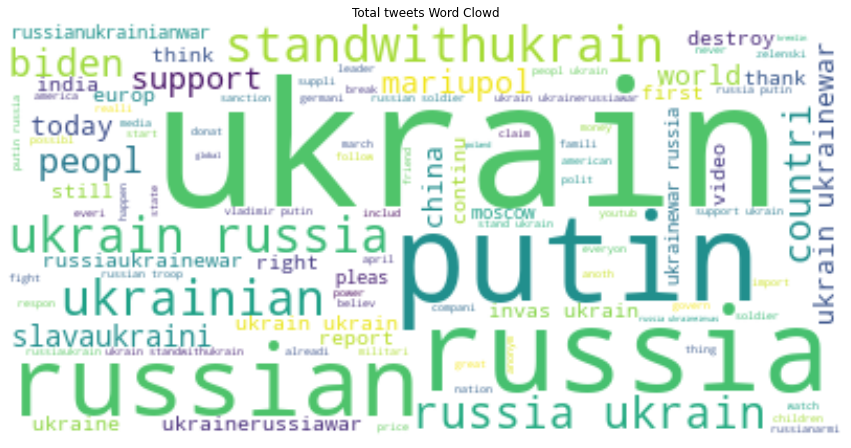

In [56]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, min_word_length=5).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total tweets Word Clowd')
plt.show()

In [46]:
from nltk.corpus import stopwords

In [47]:
stop_words = set(stopwords.words("english"))

In [48]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
for w in tokenized_sent:
    if w not in stop_words:
        pass # Do something.

NameError: name 'tokenized_sent' is not defined